In [73]:
import pandas as pd
import numpy as nm  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler 
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from subprocess import check_output
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import StackingClassifier


In [74]:
data_set = pd.read_excel(r'C:\\Users\\Sankalp Rane\\OneDrive\\Desktop\\dataset.xlsx')
print(data_set)
print

  Funny Enjoyment Blame Anxious Panicky topofme unhappy miserable crying  \
0   yes       yes   yes     yes     yes     yes     yes       yes    yes   
1    no        no   yes     yes      no      no     yes       yes     no   
2   yes        no   yes     yes     yes      no      no       yes     no   
3   yes        no   yes     yes      no      no     yes        no    yes   
4    no       yes    no     yes      no     yes     yes       yes     no   
5   yes        no    no     yes      no      no      no       yes    yes   
6    no        no    no      no      no      no      no        no     no   
7   yes        no   yes      no     yes      no     yes        no    yes   
8   yes       yes   yes      no      no      no     yes        no    yes   
9    no        no    no      no      no     yes     yes       yes    yes   

  harming Depression  
0     yes        Yes  
1      no        Yes  
2     yes         No  
3     yes         No  
4      no        Yes  
5     yes         No  
6 

In [75]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = []
stringFeatures = ['Funny','Enjoyment','Blame','Anxious','Panicky','topofme','unhappy','miserable','crying','harming','Depression' ]
floatFeatures = []

# Clean the NaN's
for feature in data_set:
    if feature in intFeatures:
        data_set[feature] = data_set[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data_set[feature] = data_set[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data_set[feature] = data_set[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data_set.head(10) 

,Funny,Enjoyment,Blame,Anxious,Panicky,topofme,unhappy,miserable,crying,harming,Depression
0,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,Yes
1,no,no,yes,yes,no,no,yes,yes,no,no,Yes
2,yes,no,yes,yes,yes,no,no,yes,no,yes,No
3,yes,no,yes,yes,no,no,yes,no,yes,yes,No
4,no,yes,no,yes,no,yes,yes,yes,no,no,Yes
5,yes,no,no,yes,no,no,no,yes,yes,yes,No
6,no,no,no,no,no,no,no,no,no,no,No
7,yes,no,yes,no,yes,no,yes,no,yes,no,Yes
8,yes,yes,yes,no,no,no,yes,no,yes,no,Yes
9,no,no,no,no,no,yes,yes,yes,yes,yes,Yes


In [76]:
labelDict = {}
for feature in data_set:
    le = preprocessing.LabelEncoder()
    le.fit(data_set[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data_set[feature] = le.transform(data_set[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
print(data_set)

label_Funny ['no', 'yes']
label_Enjoyment ['no', 'yes']
label_Blame ['no', 'yes']
label_Anxious ['no', 'yes']
label_Panicky ['no', 'yes']
label_topofme ['no', 'yes']
label_unhappy ['no', 'yes']
label_miserable ['no', 'yes']
label_crying ['no', 'yes']
label_harming ['no', 'yes']
label_Depression ['No', 'Yes']
   Funny  Enjoyment  Blame  Anxious  Panicky  topofme  unhappy  miserable  \
0      1          1      1        1        1        1        1          1   
1      0          0      1        1        0        0        1          1   
2      1          0      1        1        1        0        0          1   
3      1          0      1        1        0        0        1          0   
4      0          1      0        1        0        1        1          1   
5      1          0      0        1        0        0        0          1   
6      0          0      0        0        0        0        0          0   
7      1          0      1        0        1        0        1          0 

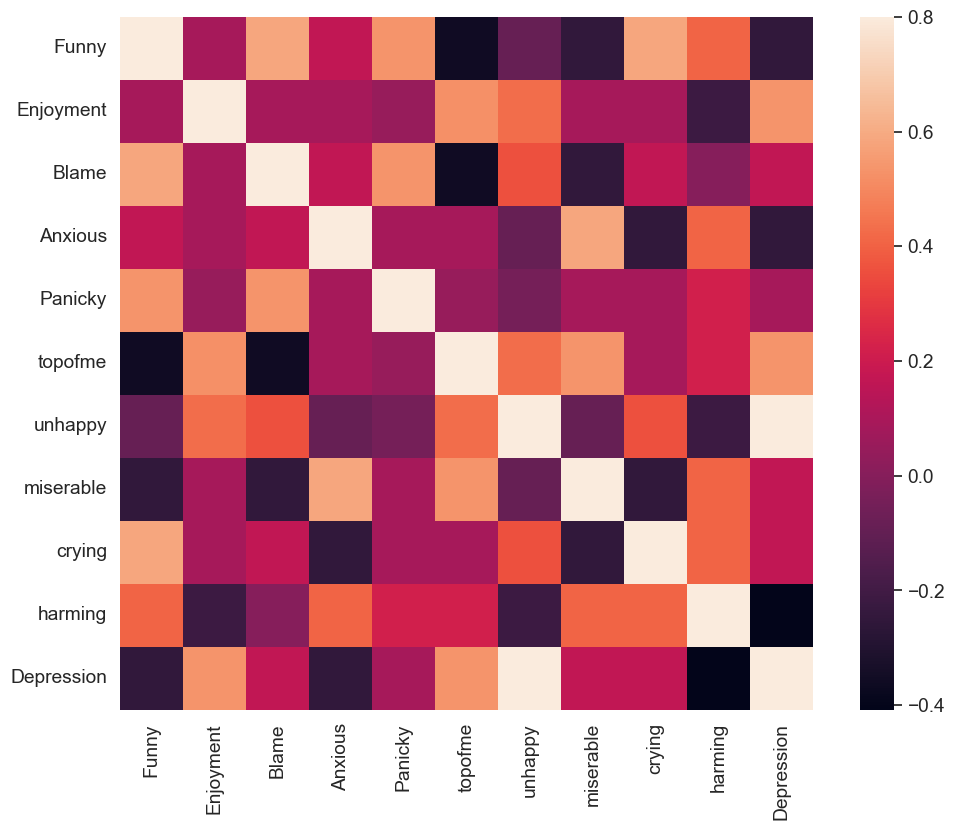

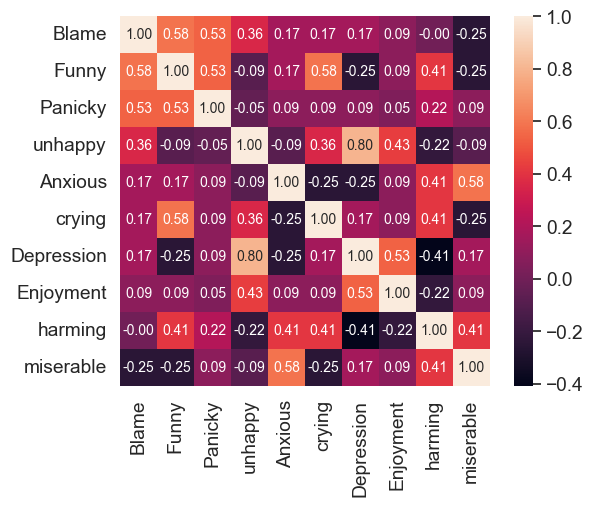

In [77]:
corrmat = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Blame')['Blame'].index
cm = nm.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [78]:
scaler = MinMaxScaler()
data_set['Anxious'] = scaler.fit_transform(data_set[['Anxious']])
data_set.head()

,Funny,Enjoyment,Blame,Anxious,Panicky,topofme,unhappy,miserable,crying,harming,Depression
0,1,1,1,1.0,1,1,1,1,1,1,1
1,0,0,1,1.0,0,0,1,1,0,0,1
2,1,0,1,1.0,1,0,0,1,0,1,0
3,1,0,1,1.0,0,0,1,0,1,1,0
4,0,1,0,1.0,0,1,1,1,0,0,1


In [79]:
feature_cols = ['Funny','Enjoyment','Blame','Anxious','Panicky','topofme','unhappy','miserable','crying','harming','Depression' ]
X = data_set[feature_cols]
y = data_set.Anxious

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

(-1.0, 11.0)

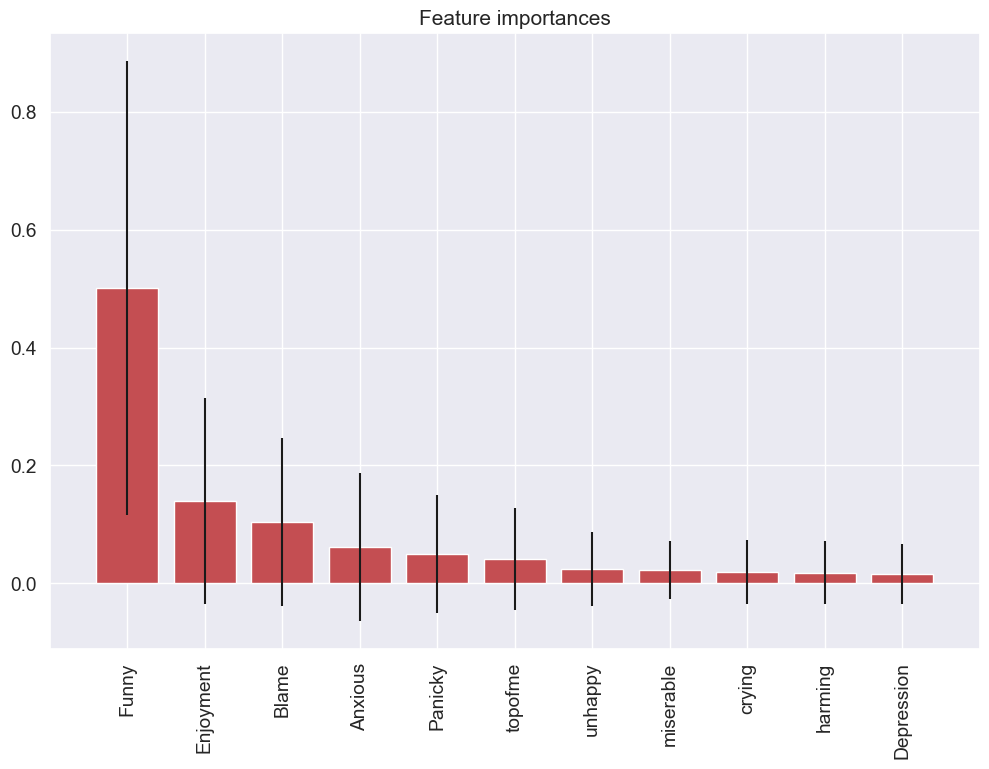

In [80]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = nm.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = nm.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])


In [81]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [82]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=2, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=2, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [109]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class)*100)
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=2, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')

    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob)
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = nm.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [107]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.6
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
[0.7, 1.0, 0.9, 0.7, 0.6, 0.8, 0.8, 1.0, 0.9, 0.8, 0.6, 0.7, 0.7, 0.6, 0.6, 0.9, 1.0, 0.6, 1.0, 0.6]
########### Random Forests ###############
Accuracy: 66.66666666666666
Null accuracy:
 1.0    2
0.0    1
Name: Anxious, dtype: int64
Percentage of ones: 0.6666666666666666
Percentage of zeros: 0.33333333333333337
True: [1. 0. 1.]
Pred: [1. 1. 1.]


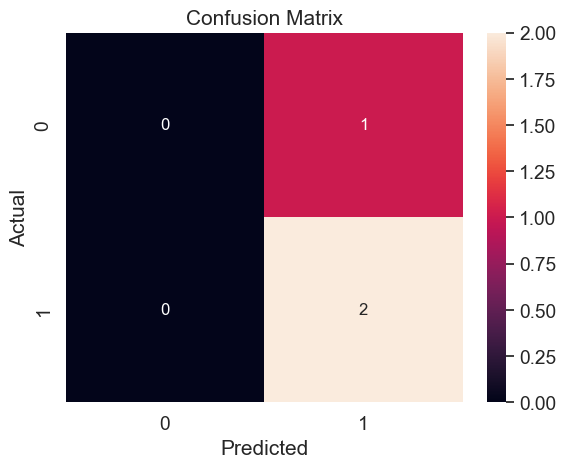

Classification Accuracy: 0.6666666666666666
Classification Error: 0.33333333333333337
False Positive Rate: 1.0
Precision: 0.6666666666666666
AUC Score: 0.5
Cross-validated AUC: 0.5
First 10 predicted responses:
 [1. 1. 1.]
First 10 predicted probabilities of class members:
 [[0.47142857 0.52857143]
 [0.47142857 0.52857143]
 [0.47142857 0.52857143]]
First 10 predicted probabilities:
 [[0.52857143]
 [0.52857143]
 [0.52857143]]


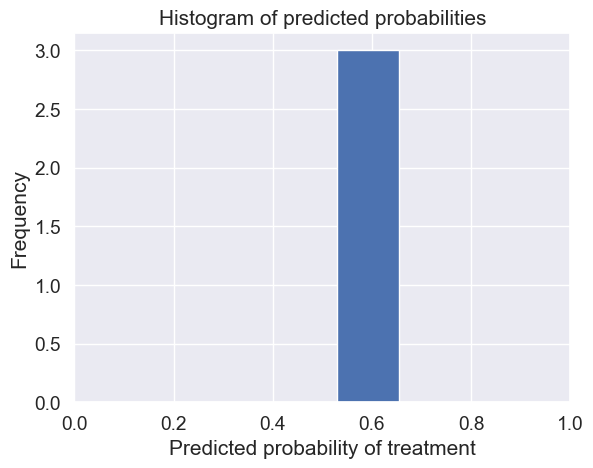

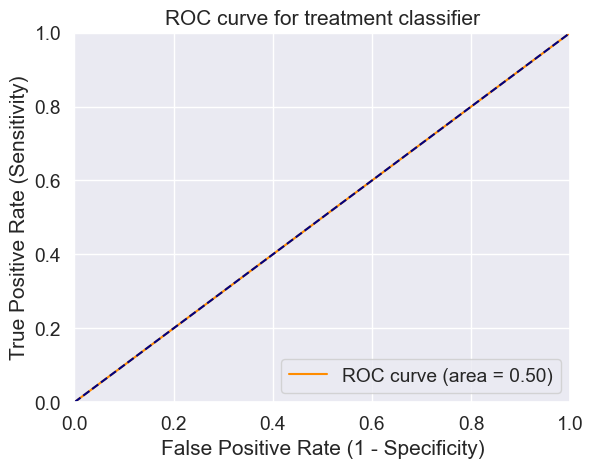

[[0 1]
 [0 2]]


In [110]:
randomForest()